In [654]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import re 

# 한글 깨짐 방지
plt.rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

In [655]:
data = []
# 분석할 이미지 경로 선언 및 유형 추출
image_path = '/Users/jsp/Desktop/workspace/projects/fstteamproject/main/git_teamprj/proj1/open/train/녹오염/6.png'
nameCategory = re.findall('[가-힣]+',image_path)[0]

class Preprocess:
    def __init__(self, image_path):
        self.img = cv.imread(image_path)
        self.resize = cv.resize(self.img, (400,400), interpolation=cv.INTER_CUBIC)
        self.gray = cv.cvtColor(self.resize, cv.COLOR_BGR2GRAY)

    def oriImg(self):
        plt.imshow(self.img)

    def canny(self):
        self.img_canny = cv.Canny(self.gray, 50, 100)
        data.append(self.img_canny)

    def threshold(self):
        threshold, self.thresh = cv.threshold(self.gray,152, 255, cv.THRESH_BINARY)
        data.append(self.thresh)

    def gaussianBlur(self):
        self.blur = cv.GaussianBlur(self.gray,(5,5), cv.BORDER_DEFAULT)
        data.append(self.blur)

    def dilate(self):
        self.img_dilated = cv.dilate(self.img_canny, (3, 3), iterations=3)
        data.append(self.img_dilated)
        
    def erode(self):
        self.img_eroded = cv.erode(self.img_dilated, (3, 3), iterations=3)
        data.append(self.img_eroded)
    
    def mix(self):
        self.img_canny = cv.Canny(self.gray, 50, 100)
        self.img_dilated = cv.dilate(self.img_canny, (7, 7), iterations=3)
        self.img_eroded = cv.erode(self.img_dilated, (7, 7), iterations=3)
        data.append(self.img_eroded)

    def recommend(self):
        threshold, self.thresh = cv.threshold(self.gray,152, 255, cv.THRESH_BINARY)
        self.blur = cv.GaussianBlur(self.thresh,(3,3), cv.BORDER_DEFAULT)
        self.img_canny = cv.Canny(self.blur , 50, 100)
        self.img_dilated = cv.dilate(self.img_canny, (3, 3), iterations=3)
        self.img_eroded = cv.erode(self.img_dilated, (3, 3), iterations=3)
        data.append(self.img_eroded)

    def showImg(self):
        plt.imshow(np.array(data)[0], cmap='gray')
        plt.title(nameCategory)
        data.pop()




In [656]:
# class 객체 생성#
img_check = Preprocess(image_path)

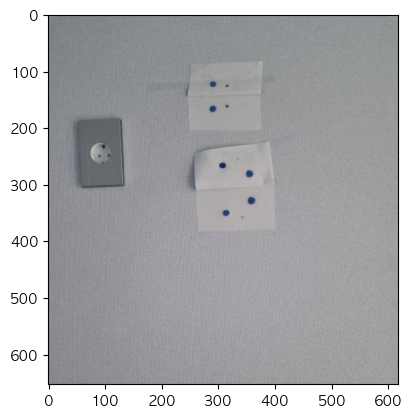

In [657]:
img_check.oriImg()

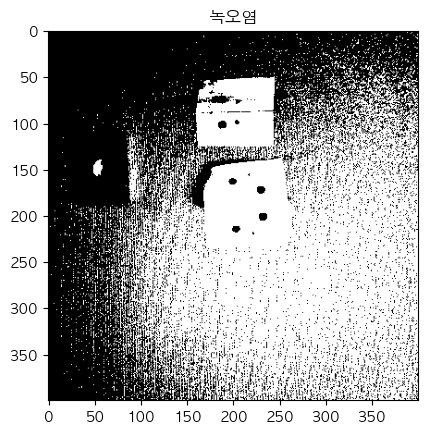

In [658]:
img_check.threshold()
img_check.showImg()

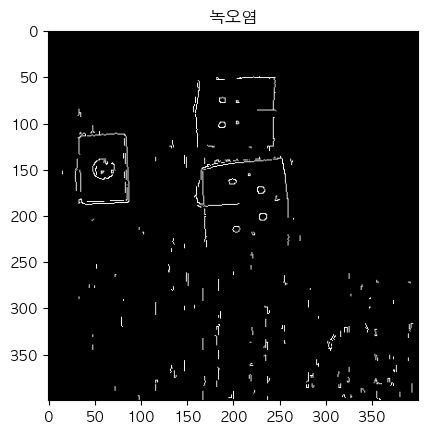

In [659]:
img_check.canny()
img_check.showImg()

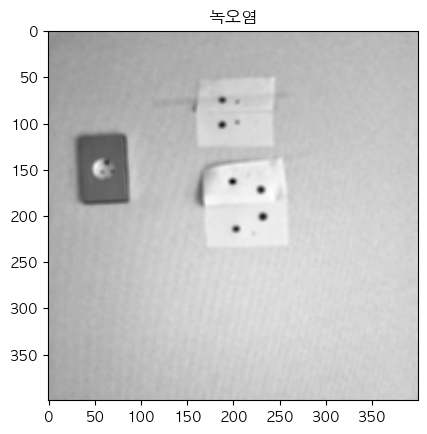

In [660]:
img_check.gaussianBlur()
img_check.showImg()

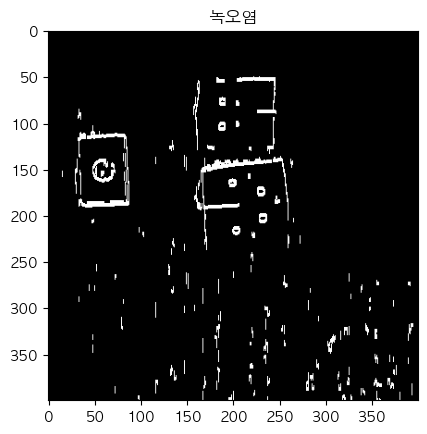

In [661]:
img_check.dilate()
img_check.showImg()

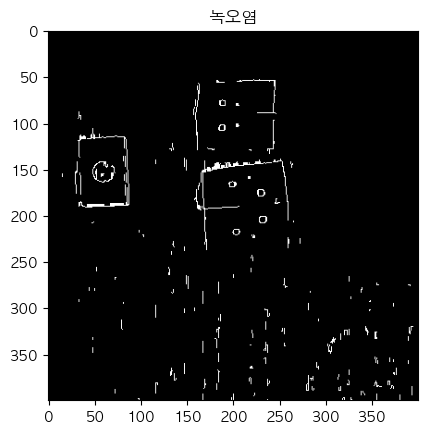

In [662]:
img_check.erode()
img_check.showImg()

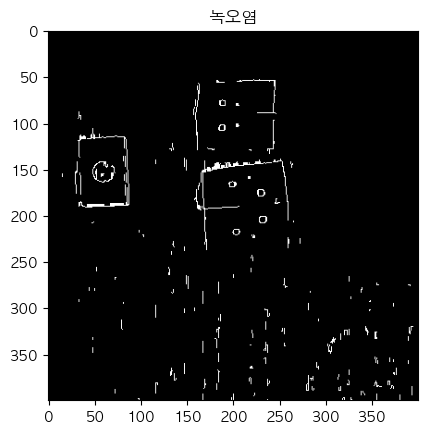

In [663]:
img_check.mix()
img_check.showImg()

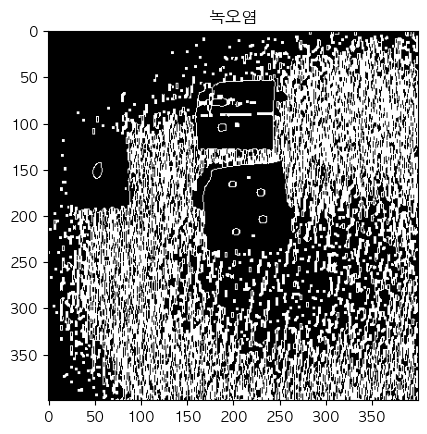

In [664]:
img_check.recommend()
img_check.showImg()